In [116]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
from sklearn import metrics
from scipy import stats
sns.set_theme()

In [222]:
clubb_dir = '/home/tsw35/tyche/clubb/'
les_dir= '/stor/soteria/hydro/shared/data/tylersclutter/doz_tylertrim/'
daylist=os.listdir(clubb_dir+'sgp_1c')
daylist.sort()
atm_dir=clubb_dir+'const_atm/'

In [223]:
#ct_n =np.linspace(.0001,.0004,31)
#ct_s= cts_to_string(ct_n) #filename strings
#ct_c= plt.cm.YlGnBu(np.linspace(0,1,31)) #colors for lines

In [258]:
folder = 'sgp_cpl_0.0003/'
circ_pow=[]
d_H=[]
std_H=[]
for day in daylist:
    fp=nc.Dataset(atm_dir+folder+day+'/k_2/clusters.nc','r')
    ur=fp['u_r'][:]
    ur[ur<0]=0
    circ_pow.append(np.sum(ur)*.0002)
    d_H.append(np.abs(np.mean(fp['H_clst'][4:10,1])
               -np.mean(fp['H_clst'][4:10,0])))
    std_H.append(np.mean(np.std(fp['H'][4:10,:,:],axis=(1,2))))

In [259]:
fp['frac'][:]

masked_array(data=[0.45704318, 0.54295682],
             mask=False,
       fill_value=1e+20)

In [260]:
def get_lhet(run_dir):
    fp_=open(run_dir+'/tw_run_param.txt','r')
    for line in fp_:
        if 'l_het' in line:
            return float(line.split(' ')[4])
    return 5

In [261]:
lhet=[]
for day in daylist:
    fold=day[4:]
    lhet.append(get_lhet(clubb_dir+'sgp_cpl_m/sgp_'+fold))
print(np.mean(lhet))

30406.26534596935


In [262]:
d_lwp1=[]
d_lwp2=[]
lwp_cpl=[]
d_theta=[]
p_time = 600 #index in time of profile
for day in daylist:
    fp1c=nc.Dataset(atm_dir+'sgp_1c/'+day+'/k_1/c_1/output/arm_sfc.nc','r')
    fp2c=nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outsfc.nc','r')
    fpcpl=nc.Dataset(atm_dir+folder+day+'/k_2/agg_outsfc.nc','r')
    fp2cz=nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outzt.nc','r')
    fpcplz=nc.Dataset(atm_dir+folder+day+'/k_2/agg_outzt.nc','r')
    d_lwp2.append(np.mean(fpcpl['lwp'][:,0,0,0])-np.mean(fp2c['lwp'][:,0,0,0]))
    d_lwp1.append(np.mean(fpcpl['lwp'][:,0,0,0])-np.mean(fp1c['lwp'][:,0,0,0]))
    lwp_cpl.append(np.mean(fpcpl['lwp'][:,0,0,0]))
    try:
        d_theta.append(np.mean(fpcplz['thlm'][p_time,0:20,0,0])-np.mean(fp2cz['thlm'][p_time,0:20,0,0]))
    except:
        d_theta.append(float('nan'))

In [263]:
def remove_nan(x1,x2):
    x1_=[]
    x2_=[]
    for i in range(len(x1)):
        if np.isnan(x1[i]):
            continue
        elif np.isnan(x2[i]):
            continue
        else:
            x1_.append(x1[i])
            x2_.append(x2[i])
    return x1_,x2_

/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


0.13658431330240586
0.009959512569613985
0.02689975523660908


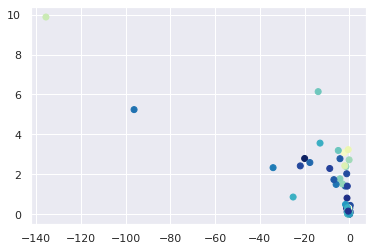

In [290]:
color=plt.cm.YlGnBu((circ_pow-np.min(circ_pow))/(np.max(circ_pow)-np.min(circ_pow)))
#l2c=-(np.array(d_lwp2)-np.array(lwp_cpl))
color=plt.cm.YlGnBu((l2c-np.min(l2c))/(np.max(l2c)-np.min(l2c)))
m=np.array(d_theta)>-200
plt.scatter(np.array(d_theta)[m],np.abs(d_lwp2/l2c)[m],color=np.array(color)[m])
#plt.ylim(0,0.01)
#plt.xlim(10,30)
d_th,d_lw=remove_nan(d_lwp2,d_H)
print(stats.spearmanr(d_lw,d_th)[0])
print(np.min(l2c))
print(np.max(l2c))


In [297]:
print(np.sum(np.array(d_theta)<-5))

12


/stor/soteria/hydro/private/tsw35/software/miniconda/envs/jenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


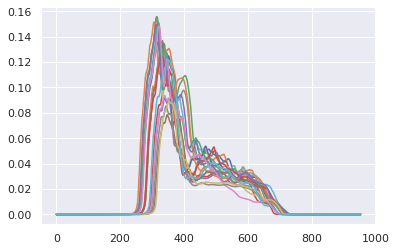

In [256]:
for day in daylist[0:20]:
    fp1c=nc.Dataset(atm_dir+'sgp_1c/'+day+'/k_1/c_1/output/arm_sfc.nc','r')
    fp2c=nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outsfc.nc','r')
    plt.plot(fp1c['lwp'][:,0,0,0])

In [ ]:
plt.scatter(d_H,circ_pow)
stats.spearmanr(circ_pow,d_H)[0]

In [ ]:
plt.scatter(circ_pow,d_lwp2)
stats.spearmanr(circ_pow,d_lwp2)[0]

In [ ]:
plt.scatter(circ_pow,lhet)

In [145]:
def compute_LE(LE,clst_):
    LEclst=np.zeros((LE.shape[0],2))
    for t in range(LE.shape[0]):
        LEclst[t,0]=np.mean(LE[t][clst_==0])
        LEclst[t,1]=np.mean(LE[t][clst_==1])
    return LEclst

In [217]:
cts =[.00001,.00005,.0001,.00015,.0002,.00025,.0003,.00035,.0004,.00045,.0005]
ctss=['0.00001','0.00005','0.0001','0.00015','0.0002',\
      '0.00025','0.0003','0.00035','0.0004','0.00045','0.0005']
v_comps={}
v_comps_l=['H_m','H_std','H_d','LE_m','LE_std','LE_d','clst_r','lhet','circ_pow','theta_d','theta_m','rtm_d','rtm_m']
for v in v_comps_l:
    v_comps[v]=np.zeros((len(cts),92))
respo={}
respo_l=['circ_pow','theta_d','theta_m','rtm_d','rtm_m','LWP_m','LWP_d','TKE_m']
for r in respo_l:
    respo[r]=np.zeros((len(cts),92))
j=0
for day in daylist:
    print(day,end='')
    fp2c   = nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outsfc.nc','r')
    fpzm2c = nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outzm.nc','r')
    fpzt2c = nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outzt.nc','r')
    fpsf2c1 = nc.Dataset(atm_dir+'sgp_nocpl/'+'/'+day+'/k_2/c_1/output/arm_sfc.nc','r')
    fpsf2c2 = nc.Dataset(atm_dir+'sgp_nocpl/'+'/'+day+'/k_2/c_2/output/arm_sfc.nc','r')
    tke2c=np.sum(fpzm2c['wp2'][:,:,0,0]+fpzm2c['up2'][:,:,0,0]+fpzm2c['vp2'][:,:,0,0],axis=1)
        
    for i in range(len(cts)):
        ct=ctss[i]
        fpclst = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/clusters.nc')
        fpsfc  = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/agg_outsfc.nc','r')
        fpzt   = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/agg_outzt.nc','r')
        fpzm   = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/agg_outzm.nc','r')
        fpsfc1 = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/c_1/output/arm_sfc.nc','r')
        fpsfc2 = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/c_2/output/arm_sfc.nc','r')
        #fp1c   = nc.Dataset(atm_dir+'sgp_1c/'+day+'/k_1/c_1/output/arm_sfc.nc','r')
        
        v_comps['H_m'][i,j]=np.mean(fpclst['H'][2:7,:,:])
        v_comps['LE_m'][i,j]=np.mean(fpclst['LE'][2:7,:,:])
        v_comps['H_std'][i,j]=np.std(fpclst['H'][2:7,:,:])
        v_comps['LE_std'][i,j]=np.std(fpclst['LE'][2:7,:,:])
        leclst=compute_LE(fpclst['LE'][:],fpclst['cluster'][0,:,:])
        v_comps['LE_d'][i,j]=np.abs(np.mean(leclst[2:7,1])-np.mean(leclst[2:7,0]))
        v_comps['H_d'][i,j]=np.abs(np.mean(fpclst['H_clst'][2:7,1])-np.mean(fpclst['H_clst'][2:7,0]))
        v_comps['clst_r'][i,j]=max(fpclst['frac'][0]/fpclst['frac'][1],fpclst['frac'][1]/fpclst['frac'][0])
        v_comps['lhet'][i,j]=get_lhet(clubb_dir+'sgp_cpl_m/sgp_'+day[4:])
        ur=fpclst['u_r'][:]
        ur[ur<0]=0
        v_comps['circ_pow'][i,j]=np.sum(ur)*cts[i]
        respo['circ_pow'][i,j]=v_comps['circ_pow'][i,j]
        thlms=fpzt['thlm'][:,0:25,:,:]
        rtms=fpzt['rtm'][:,0:25,:,:]
        thlms2=fpzt2c['thlm'][:,0:25,:,:]
        rtms2=fpzt2c['rtm'][:,0:25,:,:]
        v_comps['theta_m'][i,j]=np.mean(thlms)-np.mean(thlms2)
        respo['theta_m'][i,j]=np.mean(thlms)-np.mean(thlms2)
        v_comps['rtm_m'][i,j]=np.mean(rtms)-np.mean(rtms2)
        respo['rtm_m'][i,j]=np.mean(rtms)-np.mean(rtms2)
        respo['LWP_m'][i,j]=np.mean(fpsfc['lwp'][:,0,0,0])-np.mean(fp2c['lwp'][:,0,0,0])
        respo['LWP_d'][i,j]=np.mean(fpsfc2['lwp'][:,0,0,0]-fpsfc1['lwp'][:,0,0,0])-np.mean(fpsf2c2['lwp'][:,0,0,0]-fpsf2c1['lwp'][:,0,0,0])
        tke=np.sum(fpzm['wp2'][:,:,0,0]+fpzm['up2'][:,:,0,0]+fpzm['vp2'][:,:,0,0],axis=1)
        respo['TKE_m'][i,j]=np.mean(tke)-np.mean(tke2c)
    j=j+1
        

sgp_20150606sgp_20150609sgp_20150627sgp_20150801sgp_20150829sgp_20160518sgp_20160530sgp_20160610sgp_20160611sgp_20160614sgp_20160619sgp_20160625sgp_20160716sgp_20160719sgp_20160720sgp_20160818sgp_20160819sgp_20160830sgp_20170403sgp_20170405sgp_20170509sgp_20170524sgp_20170527sgp_20170605sgp_20170609sgp_20170614sgp_20170626sgp_20170627sgp_20170629sgp_20170630sgp_20170704sgp_20170705sgp_20170709sgp_20170712sgp_20170716sgp_20170717sgp_20170719sgp_20170720sgp_20170721sgp_20170725sgp_20170728sgp_20170802sgp_20170826sgp_20170828sgp_20170830sgp_20170922sgp_20170923sgp_20170924sgp_20180514sgp_20180522sgp_20180523sgp_20180529sgp_20180530sgp_20180531sgp_20180606sgp_20180618sgp_20180619sgp_20180704sgp_20180705sgp_20180707sgp_20180709sgp_20180710sgp_20180711sgp_20180712sgp_20180731sgp_20180805sgp_20180809sgp_20180811sgp_20180901sgp_20180902sgp_20180909sgp_20180911sgp_20180914sgp_20180916sgp_20180917sgp_20180918sgp_20181001sgp_20181002sgp_20190404sgp_20190512sgp_20190517sgp_20190607sgp_20190612sgp_

In [268]:
tdata_th=np.zeros((92,len(cts)))
p_time = 600 #index in time of profile
cut=-2.5
for i in range(92):
    day = daylist[i]
    print(str(i)+'...',end='')
    folder=day[4:]
    fp2czt=nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outzt.nc','r')
    thlm =np.mean(fp2czt['thlm'][p_time,0:20,0,0])
    for j in range(len(ctss)):
        ct=ctss[j]
        fp = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/agg_outzt.nc','r')
        try:
            dthlm=np.mean(fp['thlm'][p_time,0:20,0,0])-thlm
        except:
            dthlm=-100
        tdata_th[i,j]=dthlm

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...

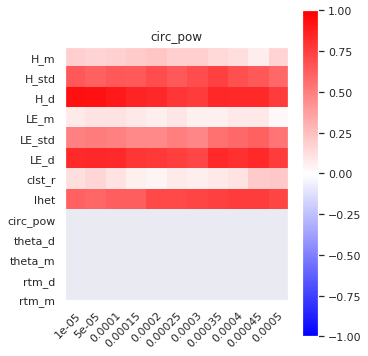

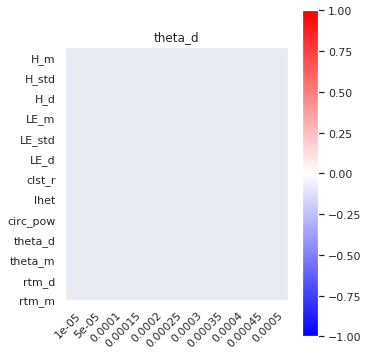

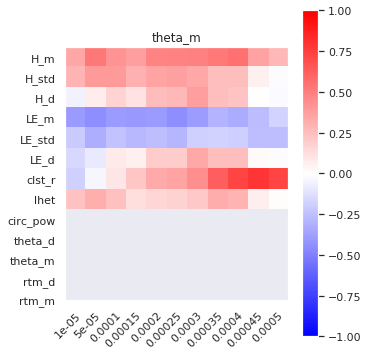

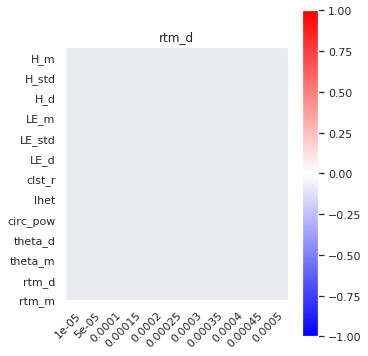

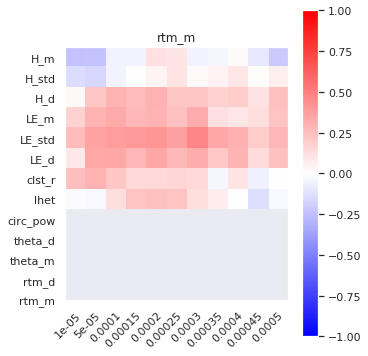

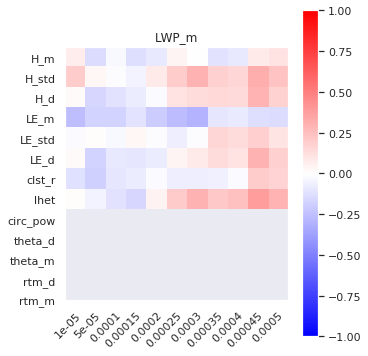

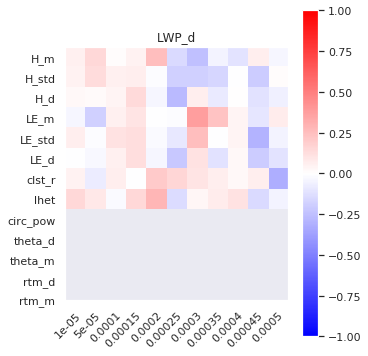

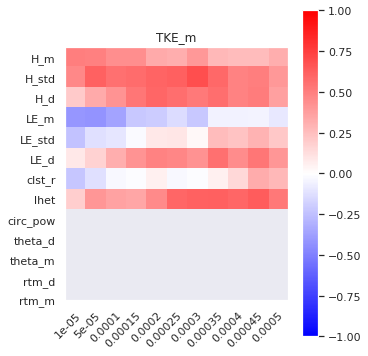

In [274]:
cut=-1
for r in respo.keys():
    correlation=np.zeros((len(cts),len(v_comps_l)))
    for i in range(len(cts)):
        for v in range(len(v_comps_l)):
            m=tdata_th[:,i]>-1
            correlation[i,v]=stats.spearmanr(v_comps[v_comps_l[v]][i,m],respo[r][i,m])[0]
    fig, ax = plt.subplots(figsize=(5,6))
    im = ax.imshow(correlation.T,cmap='bwr',vmin=-1,vmax=1)
    plt.colorbar(im)
    plt.grid(False)
    ax.set_yticks(np.arange(len(v_comps_l)))
    ax.set_yticklabels(v_comps_l)
    ax.set_xticks(np.arange(len(cts)))
    ax.set_xticklabels(cts)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    plt.title(r)
    #plt.colorbar()
    #for i in range(len(cts)):
    #    for j in range(len(v_comps_l)):
    #        text = ax.text(i, j, str(correlation[i, j])[1:3],ha="center", va="center")

In [97]:
print(atm_dir+folder+day+'/k_2/clusters.nc')

/home/tsw35/tyche/clubb/const_atm/sgp_cpl_0.0003/sgp_20190805/k_2/clusters.nc


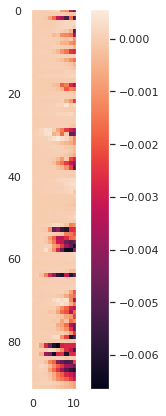

In [189]:
plt.figure(figsize=(5,7))
plt.imshow(respo['LWP_m'][:].T)
plt.colorbar()
plt.grid(False)

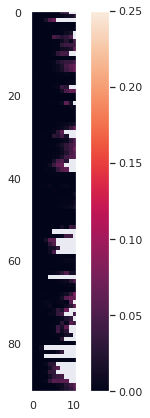

In [190]:
plt.figure(figsize=(5,7))
respoo=respo['LWP_m'][:].T
respoo[v_comps['rtm_m'][:].T<-.002]=float('nan')
plt.imshow(respoo,vmin=0,vmax=.25)
plt.colorbar()
plt.grid(False)

In [209]:
#### ENERGY AND MASS BALANCE ####
stuff={}
stuff['rtm']=np.zeros((len(cts),92))
stuff['thlm']=np.zeros((len(cts),92))
stuff['T_in_K']=np.zeros((len(cts),92))
j=0
for day in daylist:
    print(day,end='')
    fpzt2c = nc.Dataset(atm_dir+'sgp_nocpl/'+day+'/k_2/agg_outzt.nc','r')
    thlm_t = np.mean(fpzt2c['thlm'][:,:,0,0])
    tink_t = np.mean(fpzt2c['T_in_K'][:,:,0,0])
    rtm_t  = np.mean(fpzt2c['rtm'][:,:,0,0])
    for i in range(len(cts)):
        ct=ctss[i]
        fpzt   = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/agg_outzt.nc','r')
        stuff['rtm'][i,j]=np.mean(fpzt['rtm'][:,:,0,0])-rtm_t
        stuff['thlm'][i,j]=np.mean(fpzt['thlm'][:,:,0,0])-thlm_t
        stuff['T_in_K'][i,j]=np.mean(fpzt['T_in_K'][:,:,0,0])-tink_t
    j=j+1

sgp_20150606sgp_20150609sgp_20150627sgp_20150801sgp_20150829sgp_20160518sgp_20160530sgp_20160610sgp_20160611sgp_20160614sgp_20160619sgp_20160625sgp_20160716sgp_20160719sgp_20160720sgp_20160818sgp_20160819sgp_20160830sgp_20170403sgp_20170405sgp_20170509sgp_20170524sgp_20170527sgp_20170605sgp_20170609sgp_20170614sgp_20170626sgp_20170627sgp_20170629sgp_20170630sgp_20170704sgp_20170705sgp_20170709sgp_20170712sgp_20170716sgp_20170717sgp_20170719sgp_20170720sgp_20170721sgp_20170725sgp_20170728sgp_20170802sgp_20170826sgp_20170828sgp_20170830sgp_20170922sgp_20170923sgp_20170924sgp_20180514sgp_20180522sgp_20180523sgp_20180529sgp_20180530sgp_20180531sgp_20180606sgp_20180618sgp_20180619sgp_20180704sgp_20180705sgp_20180707sgp_20180709sgp_20180710sgp_20180711sgp_20180712sgp_20180731sgp_20180805sgp_20180809sgp_20180811sgp_20180901sgp_20180902sgp_20180909sgp_20180911sgp_20180914sgp_20180916sgp_20180917sgp_20180918sgp_20181001sgp_20181002sgp_20190404sgp_20190512sgp_20190517sgp_20190607sgp_20190612sgp_

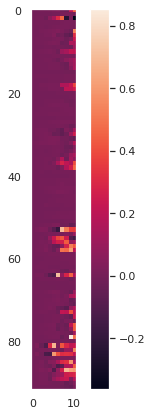

In [210]:
plt.figure(figsize=(5,7))
plt.imshow(stuff['T_in_K'][:].T)
plt.colorbar()
plt.grid(False)

In [ ]:
day=daylist[81]
ct=0.0001
fpzt1_1 = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/c_1/output/arm_zt.nc','r')
fpzt1_2 = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/c_2/output/arm_sfc.nc','r')
ct=0.0003
fpzt3_1 = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/c_1/output/arm_zt.nc','r')
fpzt3_2 = nc.Dataset(atm_dir+'sgp_cpl_'+str(ct)+'/'+day+'/k_2/c_2/output/arm_zt.nc','r')
fpzt2c1 = nc.Dataset(atm_dir+'sgp_nocpl/'+'/'+day+'/k_2/c_1/output/arm_zt.nc','r')
fpzt2c2 = nc.Dataset(atm_dir+'sgp_nocpl/'+'/'+day+'/k_2/c_2/output/arm_zt.nc','r')

In [215]:
print('### SFC ###')
for k in fpsfc.variables:
    print(k)
print()
print('### ZM ###')
for k in fpzm.variables:
    print(k)
print()
print('### ZT ###')
for k in fpzt.variables:
    print(k)

### SFC ###
time
altitude
sh
lh
lwp
ustar
cc
z_cloud_base
T_sfc
z_inversion

### ZM ###
time
altitude
thlp2_ta
thlp2_tp
thlp2_dp1
thlp2_dp2
thlp2_ma
thlp2_forcing
thlp2
wp2
up2
vp2
Richardson_num
bv_freq_sqd

### ZT ###
time
altitude
thlm
um
vm
p_in_Pa
rtm
T_in_K
thvm
ug
vg
wm
cloud_cover
rho


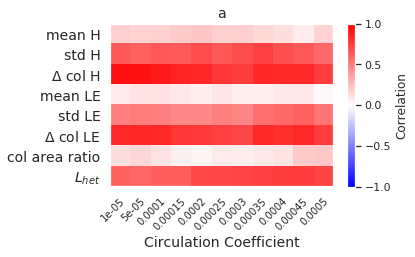

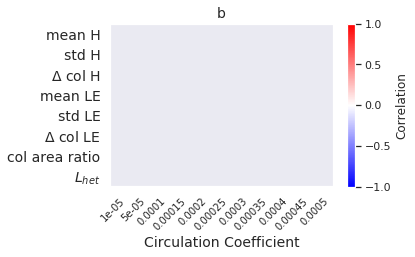

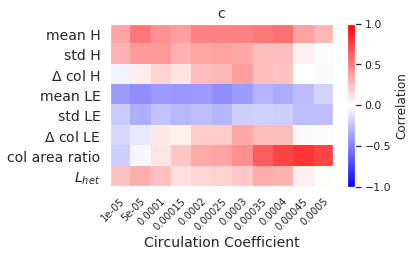

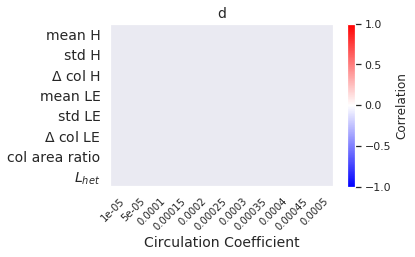

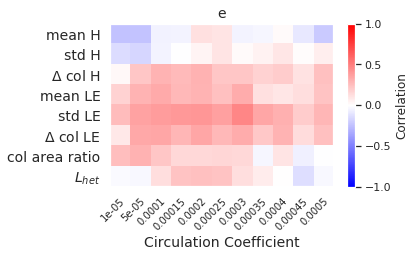

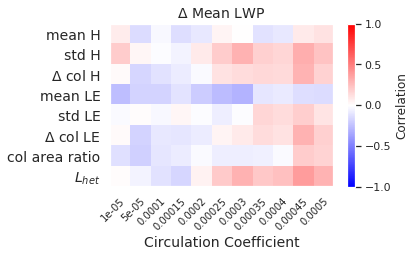

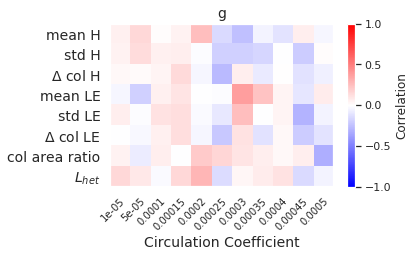

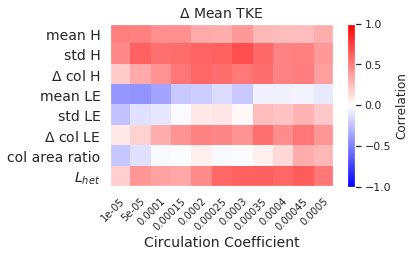

In [287]:
cut=-1
fts=14
vcompnames=['mean H','std H','$\Delta$ col H','mean LE','std LE','$\Delta$ col LE','col area ratio','$L_{het}$']
titlenames=['a','b','c','d','e','$\Delta$ Mean LWP','g','$\Delta$ Mean TKE']
ii=0
for r in respo.keys():
    correlation=np.zeros((len(cts),8))
    for i in range(len(cts)):
        for v in range(8):
            m=tdata_th[:,i]>-1
            correlation[i,v]=stats.spearmanr(v_comps[v_comps_l[v]][i,m],respo[r][i,m])[0]
    fig, ax = plt.subplots(figsize=(5,3))
    im = ax.imshow(correlation.T,cmap='bwr',vmin=-1,vmax=1)
    plt.colorbar(im,label='Correlation')
    plt.grid(False)
    ax.set_yticks(np.arange(8))
    ax.set_yticklabels(vcompnames,fontsize=fts)
    ax.set_xticks(np.arange(len(cts)))
    ax.set_xticklabels(cts,fontsize=10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    plt.title(titlenames[ii],fontsize=fts)
    plt.ylabel('')
    plt.xlabel('Circulation Coefficient',fontsize=fts)
    ii=ii+1
    #plt.colorbar()
    #for i in range(len(cts)):
    #    for j in range(len(v_comps_l)):
    #        text = ax.text(i, j, str(correlation[i, j])[1:3],ha="center", va="center")